In [6]:
import pytesseract
from pytesseract import Output
import cv2
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20,30)

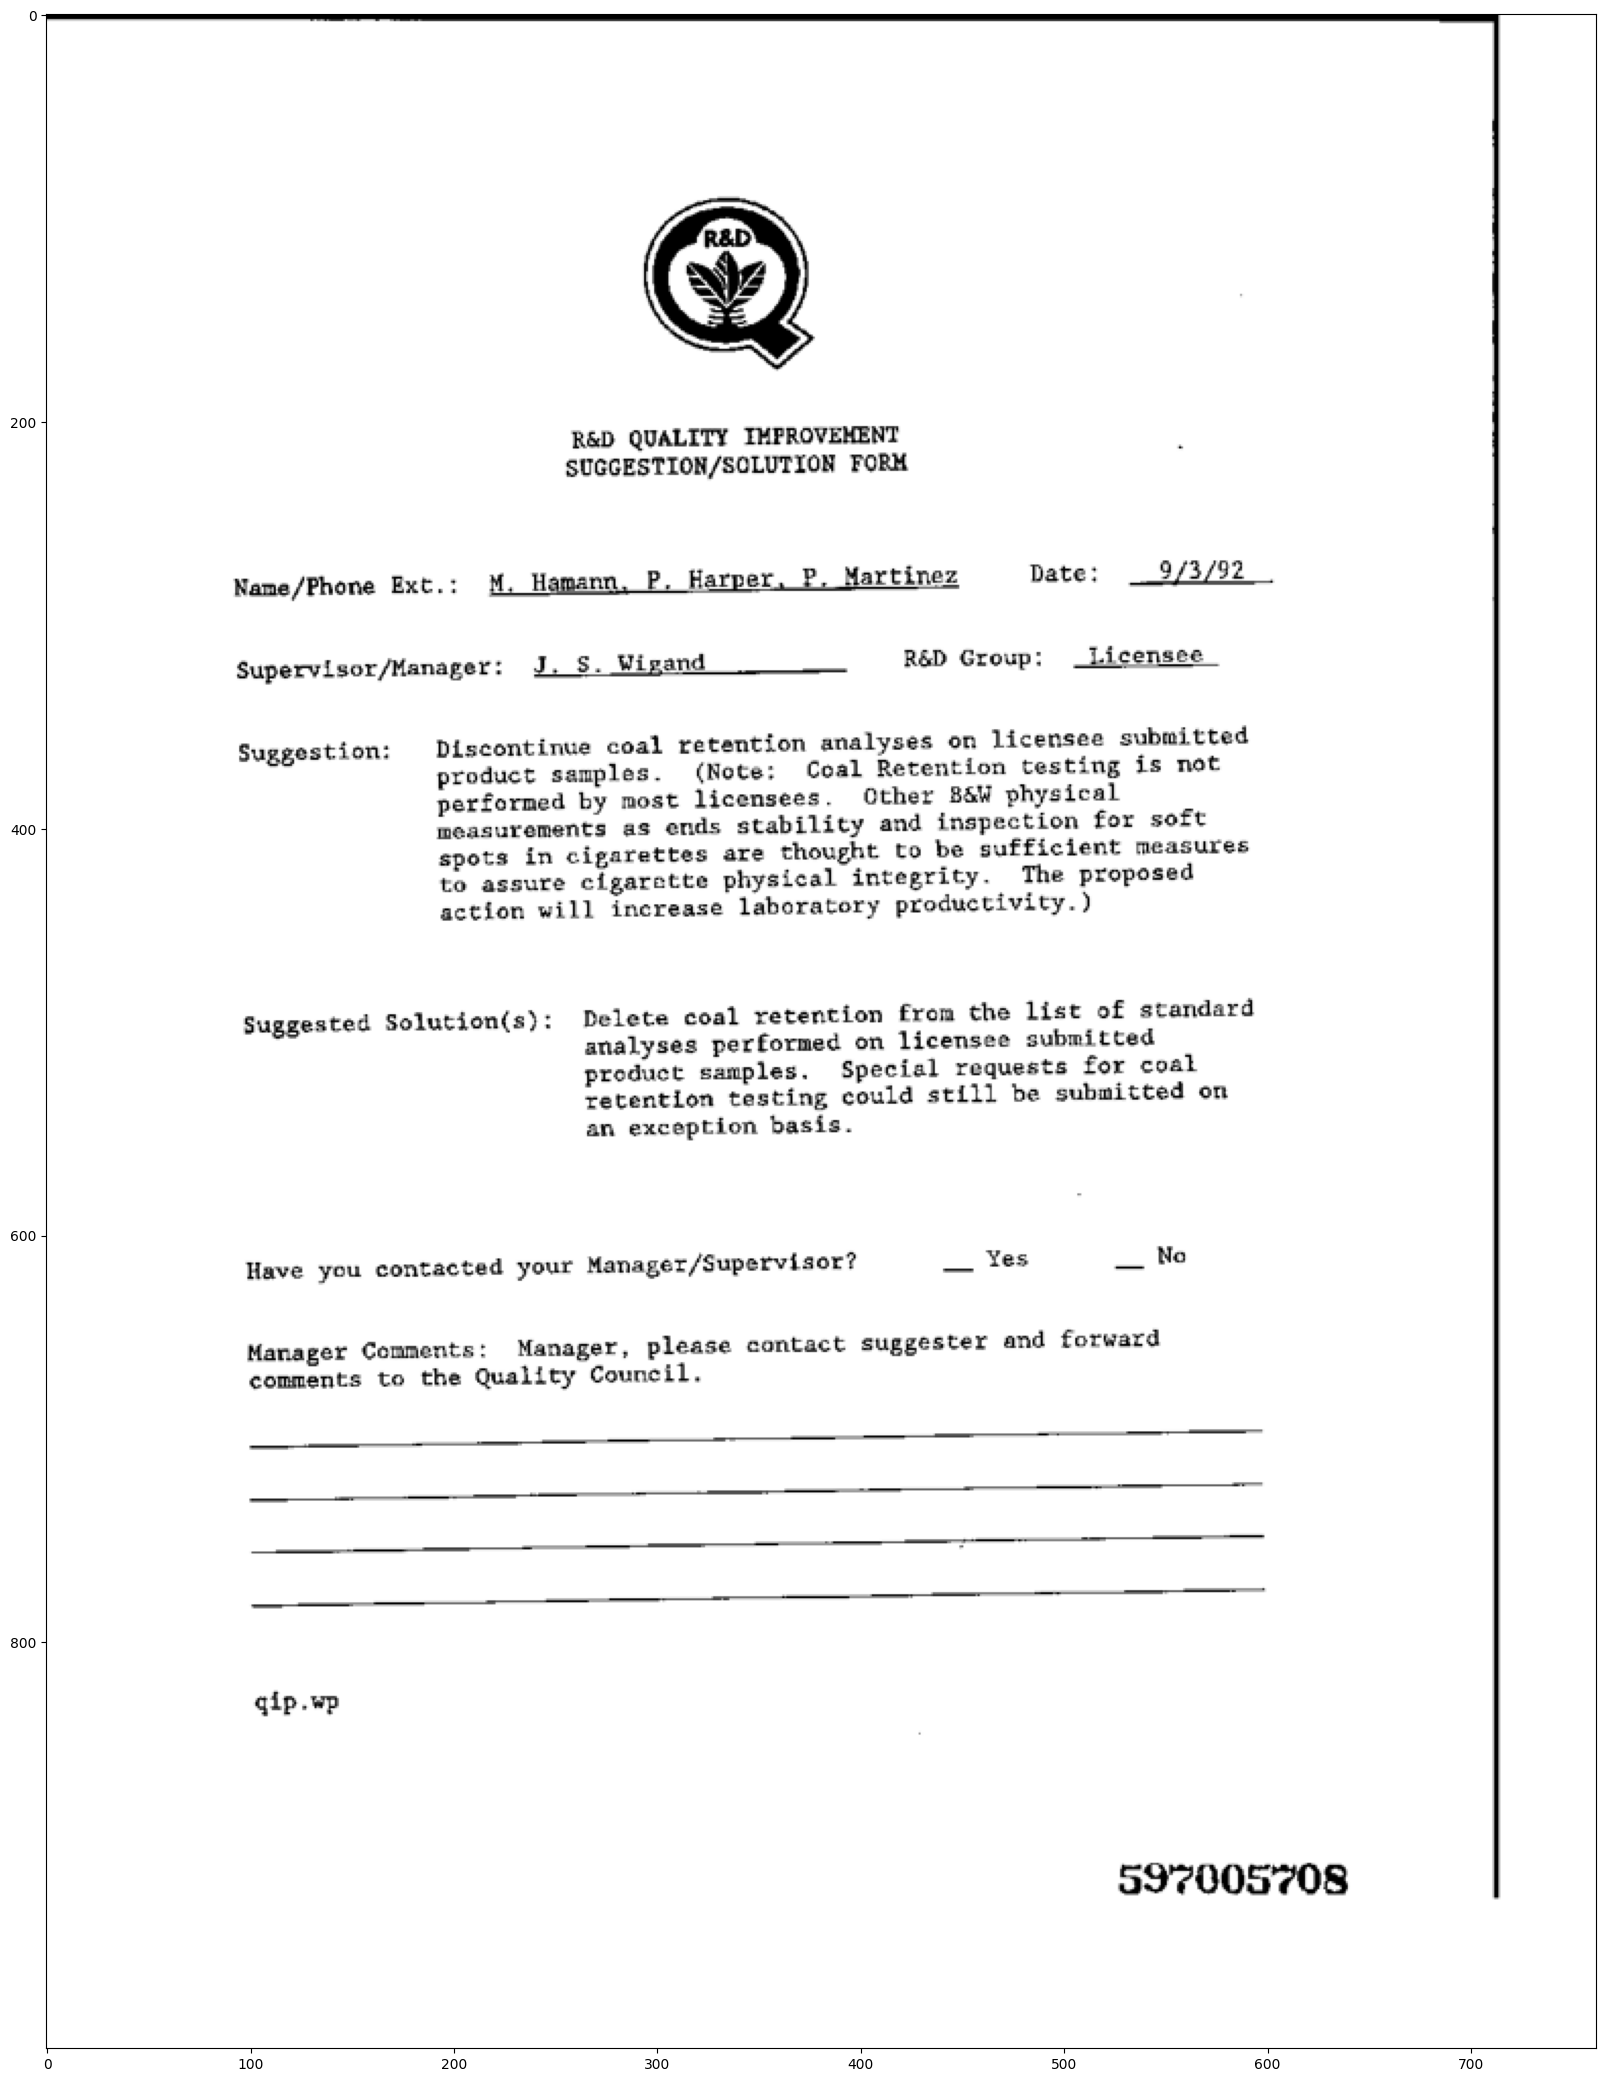

In [7]:
img = cv2.imread("document_dataset/training_data/images/0000971160.png")
plt.imshow(img)

In [8]:
d = pytesseract.image_to_data(img, output_type=Output.DICT)
print(d.keys())

TesseractNotFoundError: tesseract is not installed or it's not in your PATH. See README file for more information.

In [ ]:
for i in range(100, 105):
    print(f"Left Distance:{d['left'][i]}",
          f"Top Distance:{d['top'][i]}",
          f"Width:{d['width'][i]}",
          f"Height:{d['height'][i]}",
          f"Text:{d['text'][i]}",
          f"Conf:{d['conf'][i]}\n")

In [ ]:
img = cv2.imread("../input/invoice/invoice-sample.jpg")

n_boxes = len(d['text'])
for i in range(n_boxes):
    if int(d['conf'][i]) > 60:
        (x, y, w, h) = d["left"][i], d["top"][i], d["width"][i], d["height"][i] 
        img = cv2.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), 2) #Plotting bounding box
        img = cv2.putText(img, d['text'][i], (x, y-5), cv2.FONT_HERSHEY_SIMPLEX, 0.3, 1) #Plotting texts on top of box
        
plt.imshow(img)

In [ ]:
import re

email_pattern = '\S+@\S+'

img = cv2.imread("../input/invoice/invoice-sample.jpg")

d = pytesseract.image_to_data(img, output_type=Output.DICT)

n_boxes = len(d['text'])
for i in range(n_boxes):
    if int(d['conf'][i]) > 60:
        if re.match(email_pattern, d['text'][i]):
            (x, y, w, h) = d["left"][i], d["top"][i], d["width"][i], d["height"][i] 
            img = cv2.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), 2) #Plotting bounding box
            print(f"Email: {d['text'][i]}")
        
plt.imshow(img)